## DA 2021.4.18

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

#### **导入数据**

In [2]:
'''----------------------------Data loading-------------------------------'''
X_train = pd.read_csv('D:\\杂7杂8\\作业\\Xtrain.txt', sep='\s+', header=None)
X_test = pd.read_csv('D:\\杂7杂8\\作业\\Xtest.txt', sep='\s+', header=None)
Y_train = pd.read_csv('D:\\杂7杂8\\作业\\Ytrain.txt', sep='\s+', header=None)
Y_test = pd.read_csv('D:\\杂7杂8\\作业\\Ytest.txt', sep='\s+', header=None)


cols_num = len(X_train.columns)
cols_new = ['feature{}'.format(i+1) for i in range(351)]
X_train.columns = cols_new
X_test.columns = cols_new

#### **数据分析**
+ 检查数据在测试集开发集以及训练集上的分布情况

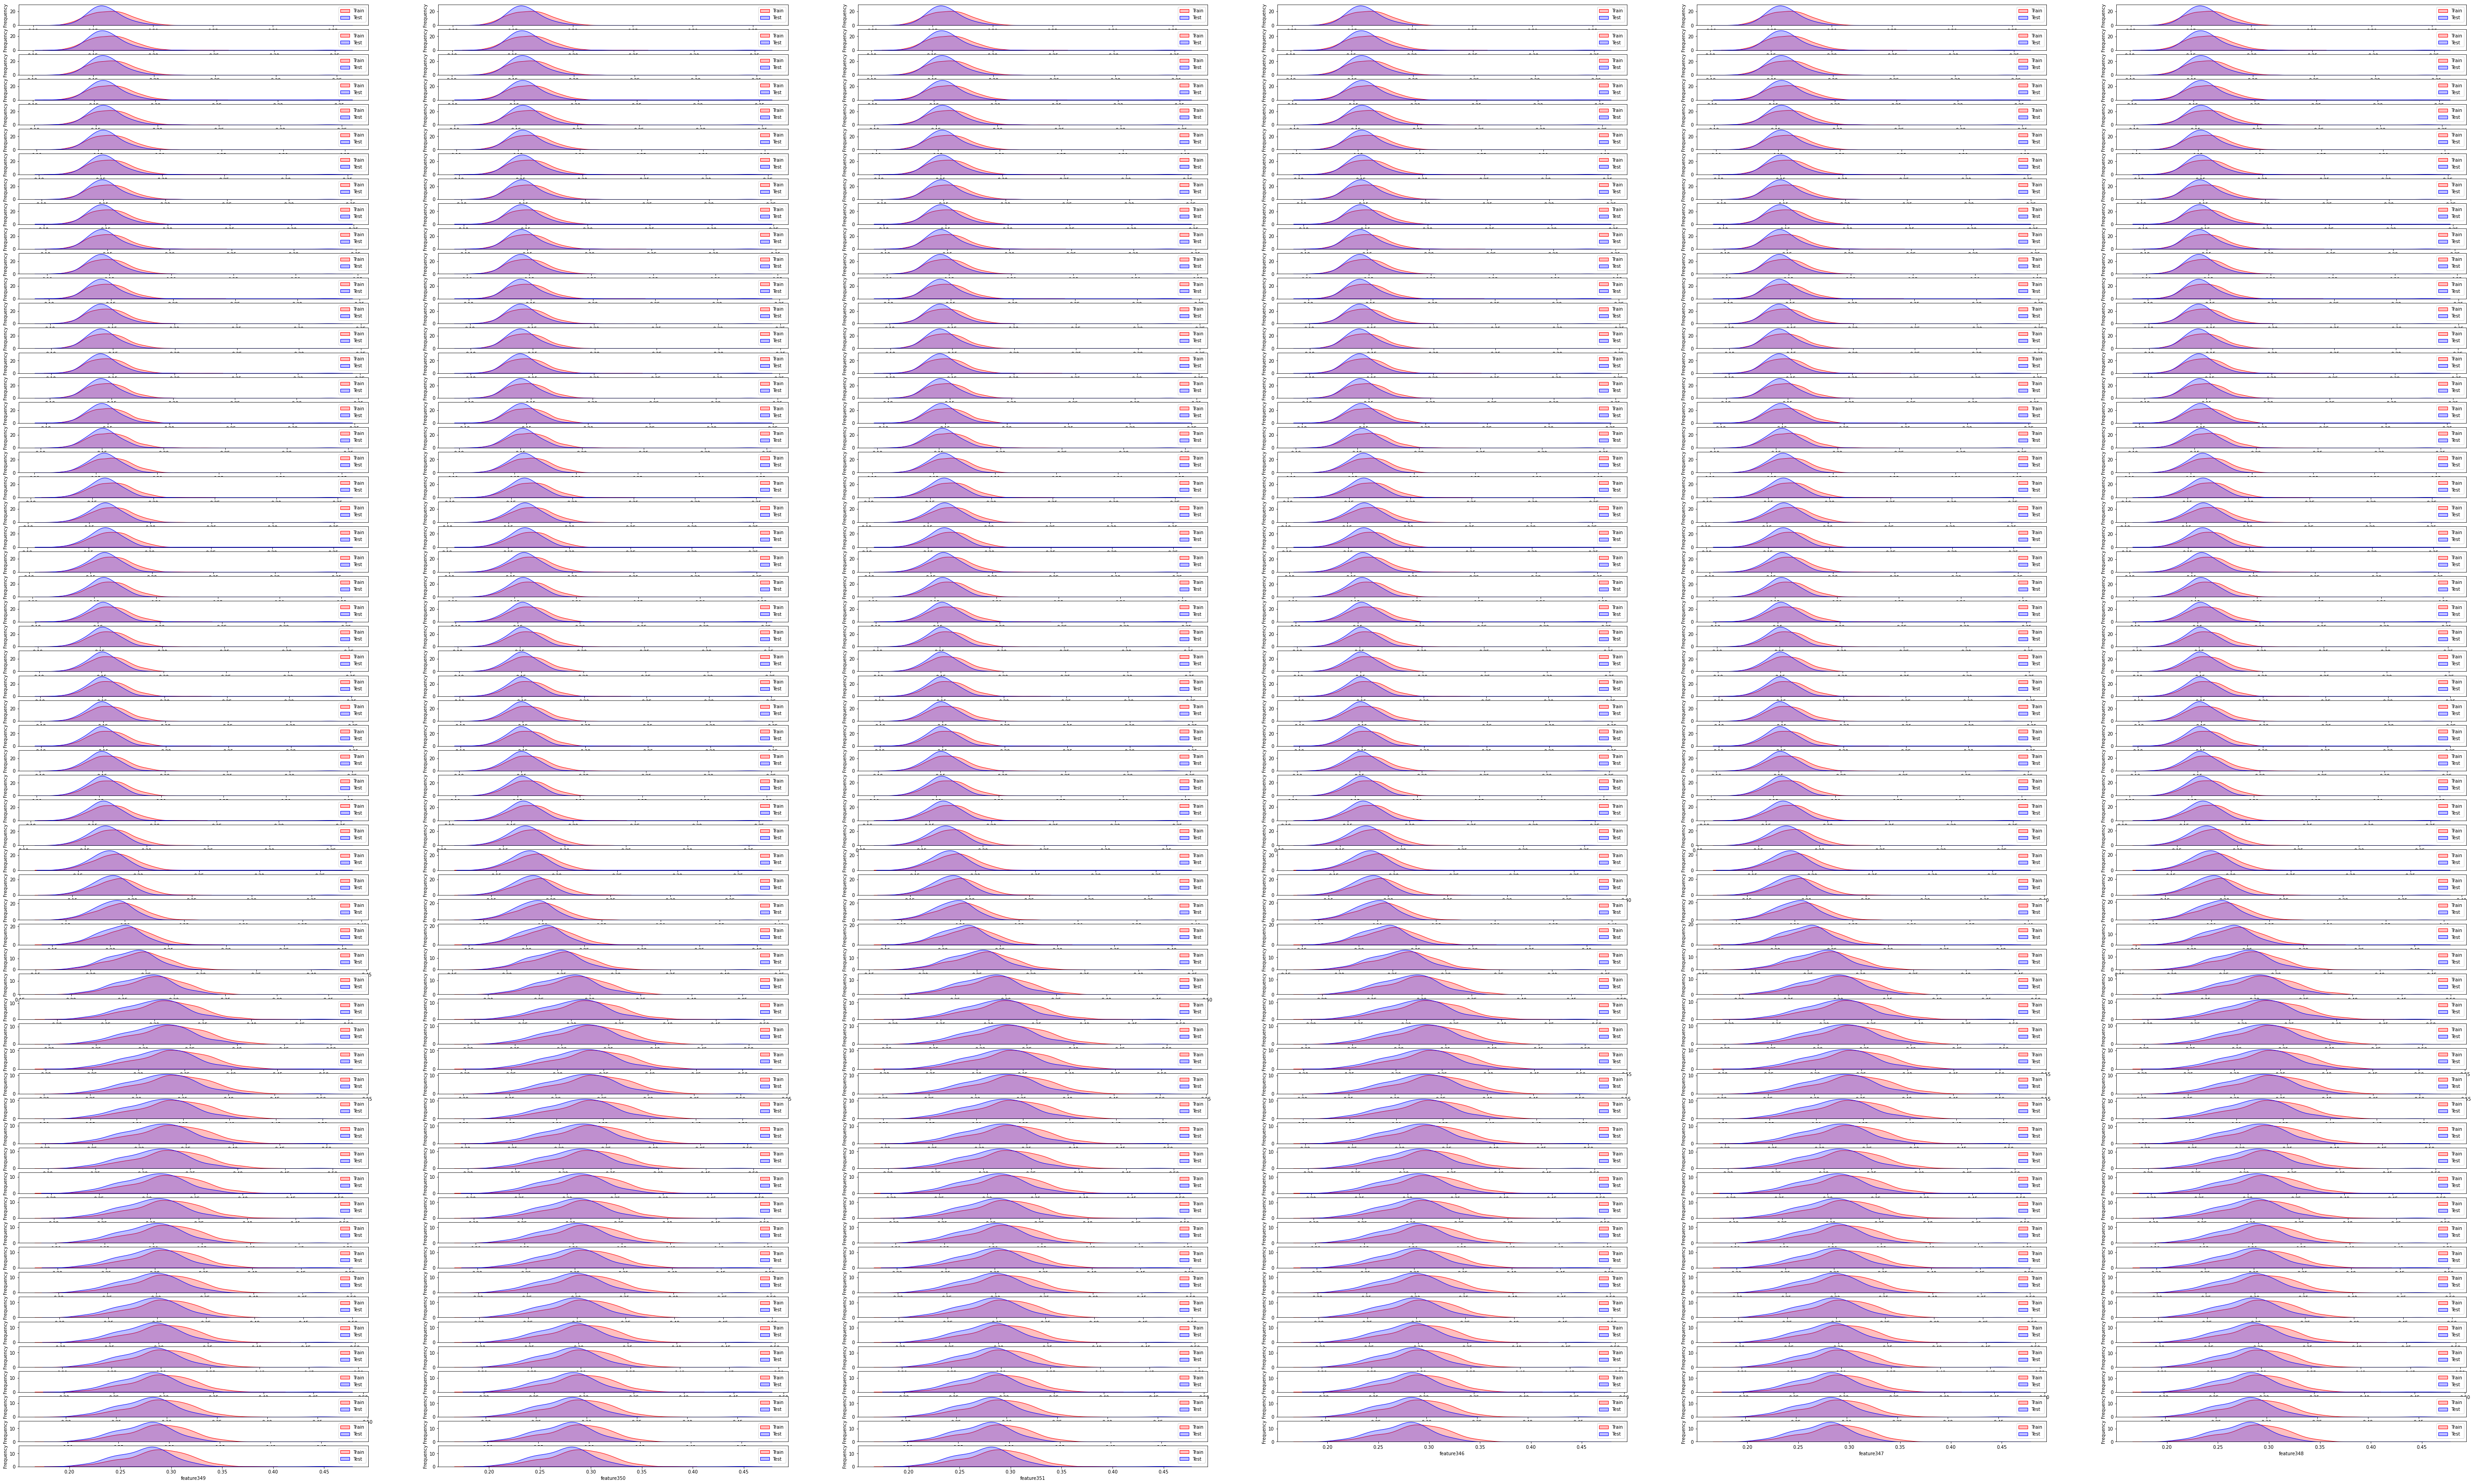

In [3]:
'''----------------------------Data analysis-----------------------------'''
dist_cols = 6
dist_rows = len(X_train.columns)
plt.figure(figsize=(16 * dist_cols, dist_rows))
i = 1
for col in X_train.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(X_train[col], color='Red', shade=True)
    ax = sns.kdeplot(X_test[col], color='Blue', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['Train', 'Test'])
    i += 1
plt.show()

+ 训练集的基本统计信息

In [4]:
X_train.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.164446,0.164365,0.164220,0.164270,0.164408,0.164506,0.164565,0.164622,0.164756,0.164925,...,0.290066,0.289520,0.288974,0.288466,0.287892,0.287388,0.287043,0.286812,0.286670,0.286615
std,0.018133,0.018096,0.018058,0.018023,0.017989,0.017950,0.017906,0.017858,0.017809,0.017762,...,0.031430,0.031346,0.031266,0.031187,0.031119,0.031058,0.031006,0.030975,0.030965,0.030970
min,0.121038,0.120935,0.120781,0.120806,0.120911,0.120986,0.121064,0.121188,0.121374,0.121568,...,0.190410,0.190097,0.189793,0.189508,0.189112,0.188781,0.188601,0.188474,0.188358,0.188287
25%,0.151526,0.151447,0.151249,0.151295,0.151392,0.151474,0.151534,0.151538,0.151732,0.152011,...,0.271253,0.270836,0.270226,0.269722,0.269166,0.268771,0.268383,0.268042,0.267812,0.267758
50%,0.164072,0.163943,0.163800,0.163858,0.163969,0.164103,0.164158,0.164253,0.164336,0.164441,...,0.291372,0.290703,0.290107,0.289760,0.289108,0.288650,0.288388,0.288331,0.288346,0.288388
75%,0.176155,0.176127,0.176057,0.176113,0.176226,0.176260,0.176281,0.176312,0.176441,0.176540,...,0.312496,0.311716,0.310932,0.310263,0.309615,0.309067,0.308758,0.308459,0.308275,0.308353
max,0.249353,0.249197,0.248986,0.249000,0.249083,0.249072,0.248998,0.248933,0.248964,0.249037,...,0.387131,0.386281,0.385426,0.384561,0.383714,0.382872,0.382191,0.381766,0.381368,0.381113


In [5]:
X_test.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.161090,0.161055,0.160946,0.161011,0.161160,0.161279,0.161356,0.161424,0.161558,0.161721,...,0.276413,0.275914,0.275408,0.274942,0.274419,0.273962,0.273654,0.273448,0.273315,0.273282
std,0.019416,0.019382,0.019348,0.019314,0.019279,0.019240,0.019196,0.019151,0.019106,0.019061,...,0.029349,0.029270,0.029193,0.029118,0.029049,0.028986,0.028937,0.028909,0.028893,0.028887
min,0.121320,0.121237,0.121085,0.121162,0.121324,0.121416,0.121491,0.121609,0.121789,0.121961,...,0.207039,0.206757,0.206459,0.206177,0.205843,0.205551,0.205374,0.205265,0.205145,0.205080
25%,0.151243,0.151210,0.151120,0.151215,0.151346,0.151423,0.151401,0.151375,0.151425,0.151510,...,0.256063,0.255631,0.255170,0.254728,0.254256,0.253851,0.253560,0.253338,0.253177,0.253094
50%,0.158774,0.158680,0.158558,0.158639,0.158790,0.158908,0.158984,0.159047,0.159149,0.159258,...,0.278313,0.278002,0.277700,0.277247,0.276678,0.276289,0.276138,0.276157,0.276237,0.276336
75%,0.167924,0.167760,0.167544,0.167502,0.167672,0.167882,0.168007,0.168093,0.168257,0.168483,...,0.293692,0.293094,0.292509,0.292130,0.291789,0.291473,0.291283,0.291192,0.291108,0.291153
max,0.346129,0.345875,0.345556,0.345388,0.345245,0.345002,0.344718,0.344463,0.344272,0.344104,...,0.450651,0.450173,0.449722,0.449305,0.448748,0.448201,0.447861,0.447725,0.447605,0.447463


+ 寻找离群值 <br/>
岭回归法($\sigma = 3$)

In [3]:
from sklearn.metrics import make_scorer
import numpy as np
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = np.sum(diff**2)    
    n = len(y_pred)   
    return np.sqrt(sum_sq/n)

def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mse, greater_is_better=False)

# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.DataFrame(model.predict(X))
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.DataFrame(model.predict(X))
  
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers=[i for i in z.index if abs(z.iloc[i,0])>sigma]
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers)

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y.values,y_pred.values,'.')
    plt.plot(y.loc[outliers].values,y_pred.loc[outliers].values,'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y.values,y.values-y_pred.values,'.')
    plt.plot(y.loc[outliers].values,y.loc[outliers].values-y_pred.loc[outliers].values,'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    return outliers

R2= 0.29901339363873414
rmse= 0    0.692701
dtype: float64
mse= 0.4798344386004975
---------------------------------------
mean of residuals: 0    7.194245e-16
dtype: float64
std of residuals: 0    0.69299
dtype: float64
---------------------------------------
5 outliers:
[213, 437, 865, 1021, 1183]


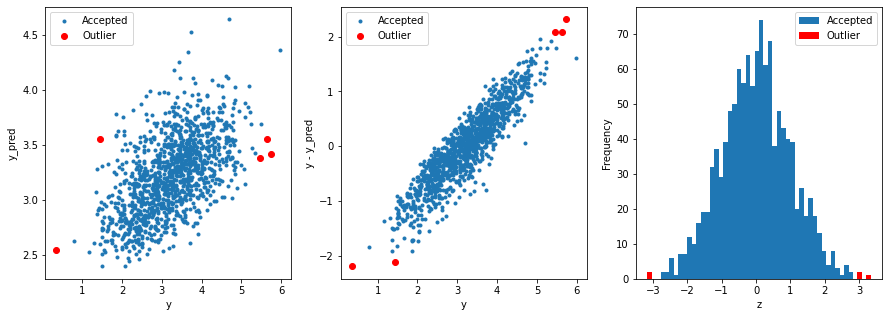

In [4]:
# get training data
from sklearn.linear_model import Ridge

# find and remove outliers using a Ridge model
outliers = find_outliers(Ridge(), X_train, Y_train)

# permanently remove these outliers from the data
X_outliers=X_train.loc[outliers]
Y_outliers=Y_train.loc[outliers]
X_train=X_train.drop(outliers)
Y_train=Y_train.drop(outliers)

+ Target 正态性查验

In [5]:
data_all=pd.concat([X_train,X_test],axis=0,ignore_index=True)
target = pd.concat([Y_train,Y_test],axis=0,ignore_index=True)
data_all['target'] = target
data_all.target.describe()

count    1395.000000
mean        3.192043
std         0.796511
min         0.790000
25%         2.580000
50%         3.210000
75%         3.730000
max         5.970000
Name: target, dtype: float64

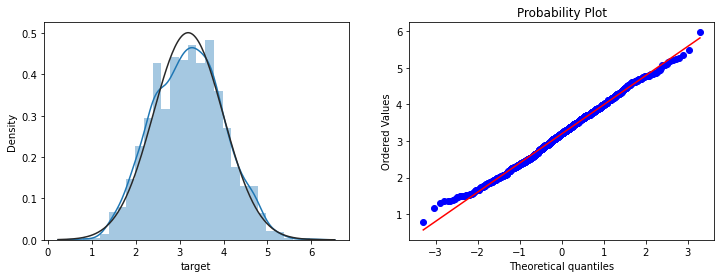

In [6]:
from scipy import stats
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_all.target.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_all.target.dropna(), plot=plt)

In [7]:
data_all.shape

(1395, 352)

#### **特征工程**
+ 梯度提升树(GBDT)进行特征选择

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
selector = SelectFromModel(GradientBoostingRegressor()).fit(data_all.iloc[:,:-1], data_all.target)
features_bool = selector.get_support() 
X = pd.DataFrame(selector.transform(data_all.iloc[:,:-1]))
X.columns = X_train.columns[features_bool]
X_train1 = X.iloc[:-200, :]
X_test1 = X.iloc[-200:, :]

In [12]:
X_train1.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature76', 'feature97', 'feature101', 'feature102', 'feature106',
       'feature108', 'feature109', 'feature110', 'feature111', 'feature112',
       'feature113', 'feature114', 'feature115', 'feature140', 'feature146',
       'feature153', 'feature157', 'feature158', 'feature159', 'feature160',
       'feature161', 'feature162', 'feature166', 'feature199', 'feature214',
       'feature222', 'feature225', 'feature228', 'feature229', 'feature231',
       'feature250', 'feature253', 'feature258', 'feature273', 'feature280',
       'feature283', 'feature296', 'feature297', 'feature298', 'feature299',
       'feature303', 'feature304', 'feature305', 'feature307', 'feature308',
       'feature309', 'feature310', 'feature311', 'feature313', 'feature314',
       'feature315', 'feature316', 'feature318', 'feature321', 'feature322',
       'feature324', 'feature327', 'feature332', 'feature345', 'feature346',

In [13]:
X_train1.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature76,feature97,feature101,feature102,...,feature321,feature322,feature324,feature327,feature332,feature345,feature346,feature348,feature350,feature351
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,0.164442,0.164360,0.164215,0.164265,0.164402,0.164501,0.145866,0.150407,0.153826,0.154807,...,0.303736,0.303193,0.301996,0.299986,0.296345,0.288415,0.287841,0.286992,0.286618,0.286564
std,0.018149,0.018112,0.018073,0.018039,0.018004,0.017965,0.015817,0.016028,0.016173,0.016221,...,0.033888,0.033786,0.033559,0.033210,0.032570,0.031235,0.031167,0.031053,0.031011,0.031015
min,0.121038,0.120935,0.120781,0.120806,0.120911,0.120986,0.105868,0.109528,0.112578,0.113461,...,0.197653,0.197364,0.196727,0.195581,0.193679,0.189508,0.189112,0.188601,0.188358,0.188287
25%,0.151501,0.151436,0.151248,0.151290,0.151390,0.151467,0.134195,0.139117,0.142552,0.143309,...,0.283111,0.282595,0.281704,0.279851,0.276389,0.269644,0.268990,0.267957,0.267721,0.267624
50%,0.164001,0.163917,0.163794,0.163847,0.163960,0.164080,0.145098,0.149875,0.153481,0.154552,...,0.303884,0.303297,0.302184,0.300343,0.297010,0.289607,0.289015,0.288312,0.288160,0.288308
75%,0.176168,0.176131,0.176082,0.176114,0.176236,0.176263,0.156357,0.161291,0.164778,0.165803,...,0.327522,0.326964,0.325669,0.323553,0.319317,0.310273,0.309642,0.308783,0.308291,0.308320
max,0.249353,0.249197,0.248986,0.249000,0.249083,0.249072,0.228683,0.230005,0.231813,0.232349,...,0.408466,0.407593,0.405686,0.402569,0.396979,0.384561,0.383714,0.382191,0.381368,0.381113


In [14]:
X_test1.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature76,feature97,feature101,feature102,...,feature321,feature322,feature324,feature327,feature332,feature345,feature346,feature348,feature350,feature351
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.161090,0.161055,0.160946,0.161011,0.161160,0.161279,0.142910,0.147026,0.150273,0.151194,...,0.288954,0.288448,0.287356,0.285491,0.282161,0.274942,0.274419,0.273654,0.273315,0.273282
std,0.019416,0.019382,0.019348,0.019314,0.019279,0.019240,0.018040,0.018025,0.018044,0.018051,...,0.031532,0.031441,0.031240,0.030935,0.030363,0.029118,0.029049,0.028937,0.028893,0.028887
min,0.121320,0.121237,0.121085,0.121162,0.121324,0.121416,0.105743,0.109399,0.112394,0.113230,...,0.213672,0.213391,0.212806,0.211831,0.210005,0.206177,0.205843,0.205374,0.205145,0.205080
25%,0.151243,0.151210,0.151120,0.151215,0.151346,0.151423,0.134228,0.138655,0.141746,0.142776,...,0.267291,0.266885,0.266076,0.264560,0.261383,0.254728,0.254256,0.253560,0.253177,0.253094
50%,0.158774,0.158680,0.158558,0.158639,0.158790,0.158908,0.141120,0.145194,0.148454,0.149361,...,0.289689,0.289171,0.288130,0.286250,0.283054,0.277247,0.276678,0.276138,0.276237,0.276336
75%,0.167924,0.167760,0.167544,0.167502,0.167672,0.167882,0.148948,0.152741,0.156066,0.157173,...,0.307963,0.307303,0.305830,0.303649,0.299686,0.292130,0.291789,0.291283,0.291108,0.291153
max,0.346129,0.345875,0.345556,0.345388,0.345245,0.345002,0.324545,0.329646,0.332814,0.333671,...,0.463884,0.463338,0.462117,0.460358,0.456860,0.449305,0.448748,0.447861,0.447605,0.447463


#### **使用LGBM模型预分析**
+ LGBM模型预分析

In [13]:
# Score
def sep(y_actual, y_predict):
    try:
        y_actual - y_predict
        return np.sqrt(np.sum(np.power(y_actual - y_predict, 2)) / (len(y_actual) - 1))
    except:
        return np.sqrt(np.sum(np.power(y_actual.values.squeeze()-y_predict, 2)) / (len(y_actual) - 1))

def mae(y_actual, y_predict):
    try:
        y_actual - y_predict
        return np.sum(abs(y_actual - y_predict) / len(y_actual))
    except:
        return np.sum(abs(y_actual.values.squeeze() - y_predict)) / len(y_actual)

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = lgb.LGBMRegressor(
    learning_rate=0.01,
    max_depth=-1,
    n_estimators=5000,
    boosting_type='gbdt',
    random_state=2021,
    objective='regression')

clf.fit(X=X_train1, y=Y_train, eval_metric='MSE', verbose=50)

LGBMRegressor(learning_rate=0.01, n_estimators=5000, objective='regression',
              random_state=2021)

In [17]:
score1 = sep(Y_test, clf.predict(X_test1))
score2 = mae(Y_test, clf.predict(X_test1))
score3 = mean_squared_error(Y_test, clf.predict(X_test1))
print('LightGBM SEP:', score1)
print('LightGBM MAE:', score2)
print('LightGBM MSE:', score3)

LightGBM SEP: 0.4677655695108266
LightGBM MAE: 0.3653626891332871
LightGBM MSE: 0.217710604879689


+ 网格参数搜索 <br/>
目前Scoring = MAE

In [18]:
'''LGB parameter adjusting'''
clf = lgb.LGBMRegressor()
parameters = {'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 1], 'n_estimators': [3000, 4000, 5000, 6000]}
clf = GridSearchCV(clf, parameters, cv=5, scoring='neg_mean_absolute_error')
clf.fit(X_train1, Y_train)
print('''Best parameters found by grid search are:''', clf.best_params_)
score_test1 = sep(Y_test, clf.predict(X_test1))
score_test2 = mae(Y_test, clf.predict(X_test1))
score_test3 = mean_squared_error(Y_test, clf.predict(X_test1))
print('''LGBMRegressor GridSearchCV test SEP:    ''', score_test1)
print('''LGBMRegressor GridSearchCV test MAE:    ''', score_test2)
print('''LGBMRegressor GridSearchCV test MSE:    ''', score_test3)

Best parameters found by grid search are: {'learning_rate': 0.005, 'n_estimators': 3000}
LGBMRegressor GridSearchCV test SEP:     0.4575158793055679
LGBMRegressor GridSearchCV test MAE:     0.3584241536301978
LGBMRegressor GridSearchCV test MSE:     0.20827417591766328


+ 5折交叉验证

In [19]:
'''5-fold cross validation'''
from sklearn.model_selection import KFold

Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2021)
MSE_DICT = {'train_sep': [], 'train_mae': [], 'test_sep': [], 'test_mae': []}
X_train2 = X_train1.values
# X_trian2 = X_pca1
Y_train2 = Y_train.values.squeeze()
# ⬆ X,Y 必须是np.array格式，要不就会index报错，原因还没清楚。
# ⬆ ！！！！！！！！！ Y must np.squeeze to be shape=(num, )
'''underline train prediction'''
for i, (train_index, test_index) in enumerate(kf.split(X_train1.values)):
    ##train_index & test_index just means trian&test in KFolds
    #MODEL LGB_tree
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.005,
        max_depth=-1,
        n_estimators=3000,
        boosting_type='gbdt',
        random_state=2021,
        objective='regression')
    
    '''split trianSet and testSet'''
    X_train_KFold, X_test_KFold = X_train2[train_index], X_train2[test_index]
    y_train_KFold, y_test_KFold = Y_train2[train_index], Y_train2[test_index]
    
    '''Model training'''
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold), (X_test_KFold, y_test_KFold)],
                eval_names=['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)
    
    '''Prediction'''
    y_train_KFold_predict = lgb_reg.predict(
        X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(
        X_test_KFold, num_iteration=lgb_reg.best_iteration_)
    
  
    print('No.{} Folds    Training and Prediction    Training_SEP Training_MAE  Prediction_SEP Prediction_MAE'.format(i + 1))
    train_sep = sep(y_train_KFold_predict, y_train_KFold)
    train_mae = mae(y_train_KFold_predict, y_train_KFold)
    print('------\n', 'Training SEP\n', train_sep, '\n', 'Training MAE\n', train_mae, '\n------')
    test_sep = sep(y_test_KFold_predict, y_test_KFold)
    test_mae = mae(y_test_KFold_predict, y_test_KFold)
    print('------\n', 'Prediction SEP\n', test_sep, '\n', 'Prediction MAE\n', test_mae, '\n------')
    
    MSE_DICT['train_sep'].append(train_sep)
    MSE_DICT['train_mae'].append(train_mae)
    MSE_DICT['test_sep'].append(test_sep)
    MSE_DICT['test_mae'].append(test_mae)

print('-----------------\n', 'Training SEP\n', MSE_DICT['train_sep'], '\n', np.mean(MSE_DICT['train_sep']), '\n-----------------')
print('Training MAE\n', MSE_DICT['train_mae'], '\n', np.mean(MSE_DICT['train_mae']))
print('-----------------\n', 'Prediction SEP\n', MSE_DICT['test_sep'], '\n', np.mean(MSE_DICT['test_sep']), '\n-----------------')
print('Prediction MAE\n', MSE_DICT['test_mae'], '\n', np.mean(MSE_DICT['test_mae']))

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.545944	Test's l2: 0.502955
[100]	Train's l2: 0.452777	Test's l2: 0.441509
[150]	Train's l2: 0.384518	Test's l2: 0.397259
[200]	Train's l2: 0.333405	Test's l2: 0.362722
[250]	Train's l2: 0.294399	Test's l2: 0.339966
[300]	Train's l2: 0.263502	Test's l2: 0.322476
[350]	Train's l2: 0.23874	Test's l2: 0.312426
[400]	Train's l2: 0.216637	Test's l2: 0.303764
[450]	Train's l2: 0.198308	Test's l2: 0.29694
[500]	Train's l2: 0.182828	Test's l2: 0.289399
[550]	Train's l2: 0.169803	Test's l2: 0.281824
[600]	Train's l2: 0.158427	Test's l2: 0.275321
[650]	Train's l2: 0.148673	Test's l2: 0.269334
[700]	Train's l2: 0.138865	Test's l2: 0.266763
[750]	Train's l2: 0.130328	Test's l2: 0.263929
[800]	Train's l2: 0.122895	Test's l2: 0.261734
[850]	Train's l2: 0.116199	Test's l2: 0.260098
[900]	Train's l2: 0.11009	Test's l2: 0.258879
[950]	Train's l2: 0.104652	Test's l2: 0.258036
[1000]	Train's l2: 0.0997106	Test's l2: 0.257552


#### **特征优化**
+ 特征优化、组合

In [9]:
epsilon = 1e-5
func_dict = {
    'add':lambda x, y: x + y,
    'mins': lambda x, y: x - y,
    'div': lambda x, y: x / (y + epsilon),
    'mult': lambda x, y: x * y
    }

'''Feature building'''
def auto_features_make(train_data, test_data, func_dict, col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for col_i in col_list:
         for col_j in col_list:
             for func_name, func in func_dict.items():
                 for data in [train_data, test_data]:
                     func_features = func(data[col_i], data[col_j])
                     col_func_features = '-'.join([col_i, func_name, col_j])
                     data[col_func_features] = func_features
    return train_data, test_data
train_data, test_data = auto_features_make(X_train1, X_test1,
                                              func_dict, col_list=X_test1.columns)

In [21]:
train_data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature76', 'feature97', 'feature101', 'feature102',
       ...
       'feature351-div-feature348', 'feature351-mult-feature348',
       'feature351-add-feature350', 'feature351-mins-feature350',
       'feature351-div-feature350', 'feature351-mult-feature350',
       'feature351-add-feature351', 'feature351-mins-feature351',
       'feature351-div-feature351', 'feature351-mult-feature351'],
      dtype='object', length=19113)

In [22]:
train_data.shape

(1195, 19113)

+ PCA降维<br/>
> 保留64个优化后的特征

In [10]:
'''PCA'''
from sklearn.decomposition import PCA

pca = PCA(n_components=64)
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)
X_train3 = train_data_pca
y_train3 = Y_train.values.squeeze()

> 查看pca成分组成

In [24]:
pca.components_

array([[ 6.32912491e-04,  6.28281320e-04,  6.22593752e-04, ...,
        -0.00000000e+00, -4.25840762e-07, -1.78963686e-03],
       [ 5.31695335e-03,  5.30890813e-03,  5.30061931e-03, ...,
         0.00000000e+00,  9.57135519e-07,  4.28238557e-03],
       [-2.26189833e-03, -2.21715361e-03, -2.17066026e-03, ...,
        -0.00000000e+00,  1.05039328e-07,  3.15674107e-04],
       ...,
       [-2.51782173e-03, -1.98293511e-03, -5.35909361e-04, ...,
        -0.00000000e+00,  2.42970204e-06, -4.43108132e-04],
       [ 2.86908786e-03,  1.61813728e-03,  5.44349693e-04, ...,
        -0.00000000e+00,  1.02105826e-07,  4.37394022e-04],
       [ 1.27834599e-03,  1.22347416e-03,  7.37525856e-05, ...,
         0.00000000e+00,  4.54726074e-07,  3.59524354e-04]])

> 累计方差贡献率

In [25]:
print(pca.explained_variance_ratio_) 

[7.31315707e-01 2.45221252e-01 1.18567488e-02 5.89196040e-03
 3.40474402e-03 9.02082454e-04 5.54676467e-04 3.02370297e-04
 2.26242193e-04 1.17453526e-04 5.85664283e-05 4.68852232e-05
 3.25122837e-05 1.04612343e-05 9.90222351e-06 9.15778971e-06
 7.11891309e-06 5.74918064e-06 5.27617078e-06 3.37470223e-06
 2.61176860e-06 2.40632739e-06 2.00664448e-06 1.56738531e-06
 1.40600518e-06 7.89610839e-07 6.07417080e-07 5.65855974e-07
 5.16955123e-07 4.60813623e-07 4.10924681e-07 3.53226847e-07
 3.08285696e-07 2.67330673e-07 2.48327457e-07 2.08451599e-07
 2.01399239e-07 1.81566153e-07 1.50584729e-07 1.38036259e-07
 1.26057099e-07 1.14817234e-07 1.10570373e-07 1.10155393e-07
 1.06174639e-07 9.12354705e-08 8.81580711e-08 7.92844072e-08
 7.68739650e-08 7.19827798e-08 6.69527788e-08 6.61548254e-08
 6.44886326e-08 5.92193600e-08 5.77372049e-08 5.63683737e-08
 5.22594719e-08 4.96398588e-08 4.69849034e-08 4.35172867e-08
 4.21203035e-08 4.08758663e-08 3.62840486e-08 3.53041263e-08]


#### **模型优化与评估（5折交叉验证）**
+ 每折训练集与开发集MSE

In [26]:
'''Model training and assessment'''
Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2021)
MSE_DICT = {'train_sep': [], 'train_mae': [], 'test_sep': [], 'test_mae': []}

for i, (train_index, test_index) in enumerate(kf.split(X_train2)):
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.005,
        min_child_samples=25,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
#         random_state=2021,
        objective='regression')
    X_train_KFold = X_train3[train_index]
    X_test_KFold = X_train3[test_index]
    y_train_KFold = y_train3[train_index]
    y_test_KFold = y_train3[test_index]

    # Model Training
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold), (X_test_KFold, y_test_KFold)],
                eval_names=['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)
    
    y_train_KFold_predict = lgb_reg.predict(
        X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(
        X_test_KFold, num_iteration=lgb_reg.best_iteration_)

    print('No.{} Folds    Training and Prediction    Training_SEP Training_MAE  Prediction_SEP Prediction_MAE'.format(i + 1))
    train_sep = sep(y_train_KFold_predict, y_train_KFold)
    train_mae = mae(y_train_KFold_predict, y_train_KFold)
    print('------\n', 'Training SEP\n', train_sep, '\n', 'Training MAE\n', train_mae, '\n------')
    test_sep = sep(y_test_KFold_predict, y_test_KFold)
    test_mae = mae(y_test_KFold_predict, y_test_KFold)
    print('------\n', 'Prediction SEP\n', test_sep, '\n', 'Prediction MAE\n', test_mae, '\n------')
    MSE_DICT['train_sep'].append(train_sep)
    MSE_DICT['train_mae'].append(train_mae)
    MSE_DICT['test_sep'].append(test_sep)
    MSE_DICT['test_mae'].append(test_mae)

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.495121	Test's l2: 0.458058
[100]	Train's l2: 0.373384	Test's l2: 0.366175
[150]	Train's l2: 0.287886	Test's l2: 0.305764
[200]	Train's l2: 0.226485	Test's l2: 0.268234
[250]	Train's l2: 0.181863	Test's l2: 0.241531
[300]	Train's l2: 0.148479	Test's l2: 0.222249
[350]	Train's l2: 0.122739	Test's l2: 0.207891
[400]	Train's l2: 0.101146	Test's l2: 0.194558
[450]	Train's l2: 0.0846598	Test's l2: 0.184792
[500]	Train's l2: 0.0711518	Test's l2: 0.175978
[550]	Train's l2: 0.0606165	Test's l2: 0.169449
[600]	Train's l2: 0.0520493	Test's l2: 0.163806
[650]	Train's l2: 0.0449002	Test's l2: 0.159284
[700]	Train's l2: 0.0391223	Test's l2: 0.156156
[750]	Train's l2: 0.0342582	Test's l2: 0.153772
[800]	Train's l2: 0.0300823	Test's l2: 0.15161
[850]	Train's l2: 0.0265441	Test's l2: 0.149315
[900]	Train's l2: 0.0235763	Test's l2: 0.146919
[950]	Train's l2: 0.0210179	Test's l2: 0.14485
[1000]	Train's l2: 0.0187633	Test's l

+ 训练集 **SEP | MAE**

In [27]:
print('-----------------\n', 'Training SEP\n', MSE_DICT['train_sep'], '\n', np.mean(MSE_DICT['train_sep']), '\n-----------------')
print('Training MAE\n', MSE_DICT['train_mae'], '\n', np.mean(MSE_DICT['train_mae']))

-----------------
 Training SEP
 [0.049489568700205586, 0.04754821589470379, 0.025118274174379573, 0.0441778644994031, 0.022771321892184556] 
 0.03782104903217533 
-----------------
Training MAE
 [0.025255735386589075, 0.02375885977293377, 0.010411587872846993, 0.019063398372154726, 0.005658180007056579] 
 0.016829552282316227


+ 开发集 **SEP | MAE**

In [28]:
print('-----------------\n', 'Prediction SEP\n', MSE_DICT['test_sep'], '\n', np.mean(MSE_DICT['test_sep']), '\n-----------------')
print('Prediction MAE\n', MSE_DICT['test_mae'], '\n', np.mean(MSE_DICT['test_mae']))

-----------------
 Prediction SEP
 [0.363299219885868, 0.3824704492020586, 0.42933885696995805, 0.36981913580807296, 0.41594119531587054] 
 0.3921737714363656 
-----------------
Prediction MAE
 [0.29029284352587204, 0.2962957456061861, 0.3188922600659131, 0.28625861832685845, 0.31590013630480257] 
 0.30152792076592644


+ 测试集 **SEP | MAE**

In [29]:
print('Test Set SEP:', sep(Y_test, lgb_reg.predict(test_data_pca)))
print('Test Set MAE:', mae(Y_test, lgb_reg.predict(test_data_pca)))

Test Set SEP: 0.34352239252573885
Test Set MAE: 0.2721619712939323


#### **简单多层BP神经网络**
+ 特征优化 + ReLu + BatchNormalization + Dense + mini_batch + Adam
+ 网络结构:<br/>
**input⬇<br/>->Dense_layer(1024, ReLu)->BatchNormalization ⬇<br/>->Dense_layer(512, ReLu)->BatchNormalization⬇<br/>->Dense_layer(128, ReLu)->BatchNormalization
⬇<br/>->Dense_layer(32, ReLu)->BatchNormalization⬇<br/>->Dense_layer(8, ReLu)->BatchNormalization⬇<br/>->Dense_layer(1, None Activation)⬇<br/>output**

In [11]:
'''-----------------------------Deep Learning-------------------------------'''

import pandas as pd
import numpy as np
from keras.layers import Dense, Input, BatchNormalization
from keras import Model
from sklearn.model_selection import train_test_split

X_train_1, X_train_2, Y_train_1, Y_train_2 = train_test_split(X_train3,y_train3,test_size=0.1,random_state=0)
input_layer=Input((X_train3.shape[1],))
x=input_layer
x=BatchNormalization()(x)
x=Dense(1024, activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(512, activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(128, activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(32, activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(8, activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(1)(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664 

In [18]:
from keras.optimizers import Adam

model.compile(loss='mse',optimizer=Adam(lr=0.01),metrics=['mae'])
model.fit(X_train_1,Y_train_1,
          validation_data=(X_train_2,Y_train_2),
          batch_size=100,
          epochs=25)

Y_predict = model.predict(pd.DataFrame(test_data_pca))

print('DL MSE Score:', mean_squared_error(Y_test, Y_predict))
print('DL SEP Score:', sep(Y_test, Y_predict))
print('DL MAE Score:', mae(Y_test, Y_predict))

Epoch 1/25
11/11 [==============================] - 2s 32ms/step - loss: 0.0236 - mae: 0.1173 - val_loss: 0.1156 - val_mae: 0.2515
Epoch 2/25
11/11 [==============================] - 0s 13ms/step - loss: 0.0291 - mae: 0.1321 - val_loss: 0.1951 - val_mae: 0.3494
Epoch 3/25
11/11 [==============================] - 0s 13ms/step - loss: 0.0252 - mae: 0.1237 - val_loss: 0.2971 - val_mae: 0.4002
Epoch 4/25
11/11 [==============================] - 0s 12ms/step - loss: 0.0323 - mae: 0.1456 - val_loss: 0.1419 - val_mae: 0.2830
Epoch 5/25
11/11 [==============================] - 0s 13ms/step - loss: 0.0267 - mae: 0.1281 - val_loss: 0.2844 - val_mae: 0.3749
Epoch 6/25
11/11 [==============================] - 0s 13ms/step - loss: 0.0198 - mae: 0.1111 - val_loss: 0.2828 - val_mae: 0.4263
Epoch 7/25
11/11 [==============================] - 0s 14ms/step - loss: 0.0169 - mae: 0.1042 - val_loss: 0.2973 - val_mae: 0.3963
Epoch 8/25
11/11 [==============================] - 0s 14ms/step - loss: 0.0229 - m

#### **改进：**
+ 没有了解数据真正含义，只是做了一般的分析
+ 模型过拟合比较严重，决策树不一定是一个好的选择（可以尝试用rbf核的是SVM回归，可能也能达到类似的效果）
+ 尝试bagging的方法可能会更好
+ 最后只是用了简单的MLP方法，Adam，没有进行过多的参数调整，而且用的数据特征也是之前做过处理的，但是只要模型足够深是不需要这样的
+ 优化模型时的损失函数要是自己写可能会更好（结合两个指标）